### 의사결정트리
- 순서: 데이터 전처리 -> (반복: 학습 -> 결과 확인 -> 파라미터 조정) -> 모델 저장
- 서버에서는 저장된 모델을 불러와서 예측만 하기
- 현재 문제: 데이터 전처리 후 라벨 true 값이 너무 적음 -> 전처리 다시하기

#### 참고: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

##### 1. 라이브러리 가져오기

In [2]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

##### 2. 데이터셋 로드 -> 컬럼 추출

In [3]:
temp = pd.read_csv("outFile.csv",engine='python',encoding='cp949')

In [64]:
#사용할 컬러만 추출
tmp = temp[["HE_HbA1c", "HE_chol", "age", "HE_glu", "HE_wc", "N_EN", "edu", 
            "Total_slp_wk","Total_slp_wd","BE3_32", "EC_wht_23", "HE_DMfh1",
            "HE_BMI","HE_DMfh2", "HE_DMfh3","BD2_31",
            "BS6_3", "BP1", "BD2_1", "BD1_11", "BE5_1", "EC_wht_5", "HE_DMdg"]]
#print(tmp.columns)

##### 3. 데이터 전처리
- 모름/무응답 행 제거
- 중복 값 처리
- 컬럼 합치기
- null 처리 된 0 복원 등

In [65]:
tmp[:] = np.nan_to_num(tmp)
for index in tmp.columns:
     tmp = tmp.loc[tmp[index]!=9]
        
tmp[:] = np.nan_to_num(tmp)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [66]:
tmp['HE_DMfh'] = 0
tmp.loc[tmp.HE_DMfh1 == 1, 'HE_DMfh'] = 1
tmp.loc[tmp.HE_DMfh2 == 1, 'HE_DMfh'] = 1
tmp.loc[tmp.HE_DMfh3 == 1, 'HE_DMfh'] = 1
del tmp['HE_DMfh1']
del tmp['HE_DMfh2']
del tmp['HE_DMfh3']
#tmp

In [82]:
tmp.HE_DMdg.value_counts()

0.0    6567
1.0     427
Name: HE_DMdg, dtype: int64

##### 4. feature, label 지정

In [67]:
feature_cols = ["HE_HbA1c", "HE_chol", "age", "HE_glu", "HE_wc", "N_EN", "edu", 
            "Total_slp_wk","Total_slp_wd","BE3_32", "EC_wht_23",
            "HE_BMI","HE_DMfh","BD2_31",
            "BS6_3", "BP1", "BD2_1", "BD1_11", "BE5_1", "EC_wht_5"]
X = tmp[feature_cols] # Features
y = tmp.HE_DMdg # Target variable

##### 5. train, test data 나누기
- 70% training, 30% test

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

##### 6. 트리 생성
- 학습 및 정확도 
- percentage: predict_proba
- 참고: https://stackoverflow.com/questions/47251594/scikit-learn-decision-tree-probability-of-prediction-being-a-or-b
- classification: predict
- auc 참고: http://blog.naver.com/PostView.nhn?blogId=congguksu&logNo=220025013734

In [69]:
#clf = DecisionTreeClassifier()
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#y_pred = clf.predict_proba(X_test)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(clf, X, y, cv=10, scoring="roc_auc")

print("=== Confusion Matrix ===") #true positive/ false negative/ false positive/ true nagative
print(confusion_matrix(y_test, y_pred)) #evaluate the accuracy of a classification
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1916   51]
 [  56   76]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97      1967
        1.0       0.60      0.58      0.59       132

avg / total       0.95      0.95      0.95      2099



=== All AUC Scores ===
[0.83361651 0.79319316 0.83894375 0.76059255 0.78537043 0.7646101
 0.80025486 0.80389808 0.78742015 0.7681838 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7936083392472185


In [71]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

print("roc_auc: ",metrics.roc_auc_score(y_test, y_pred))
print("Accuracy:",clf.score(X_train,y_train))
print("accuracy_score: ",metrics.accuracy_score(y_test, y_pred))

roc_auc:  0.7749148834558086
Accuracy: 1.0
accuracy_score:  0.949023344449738


##### 7. 생성된 트리 시각화 및 주요 특성 확인

In [72]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

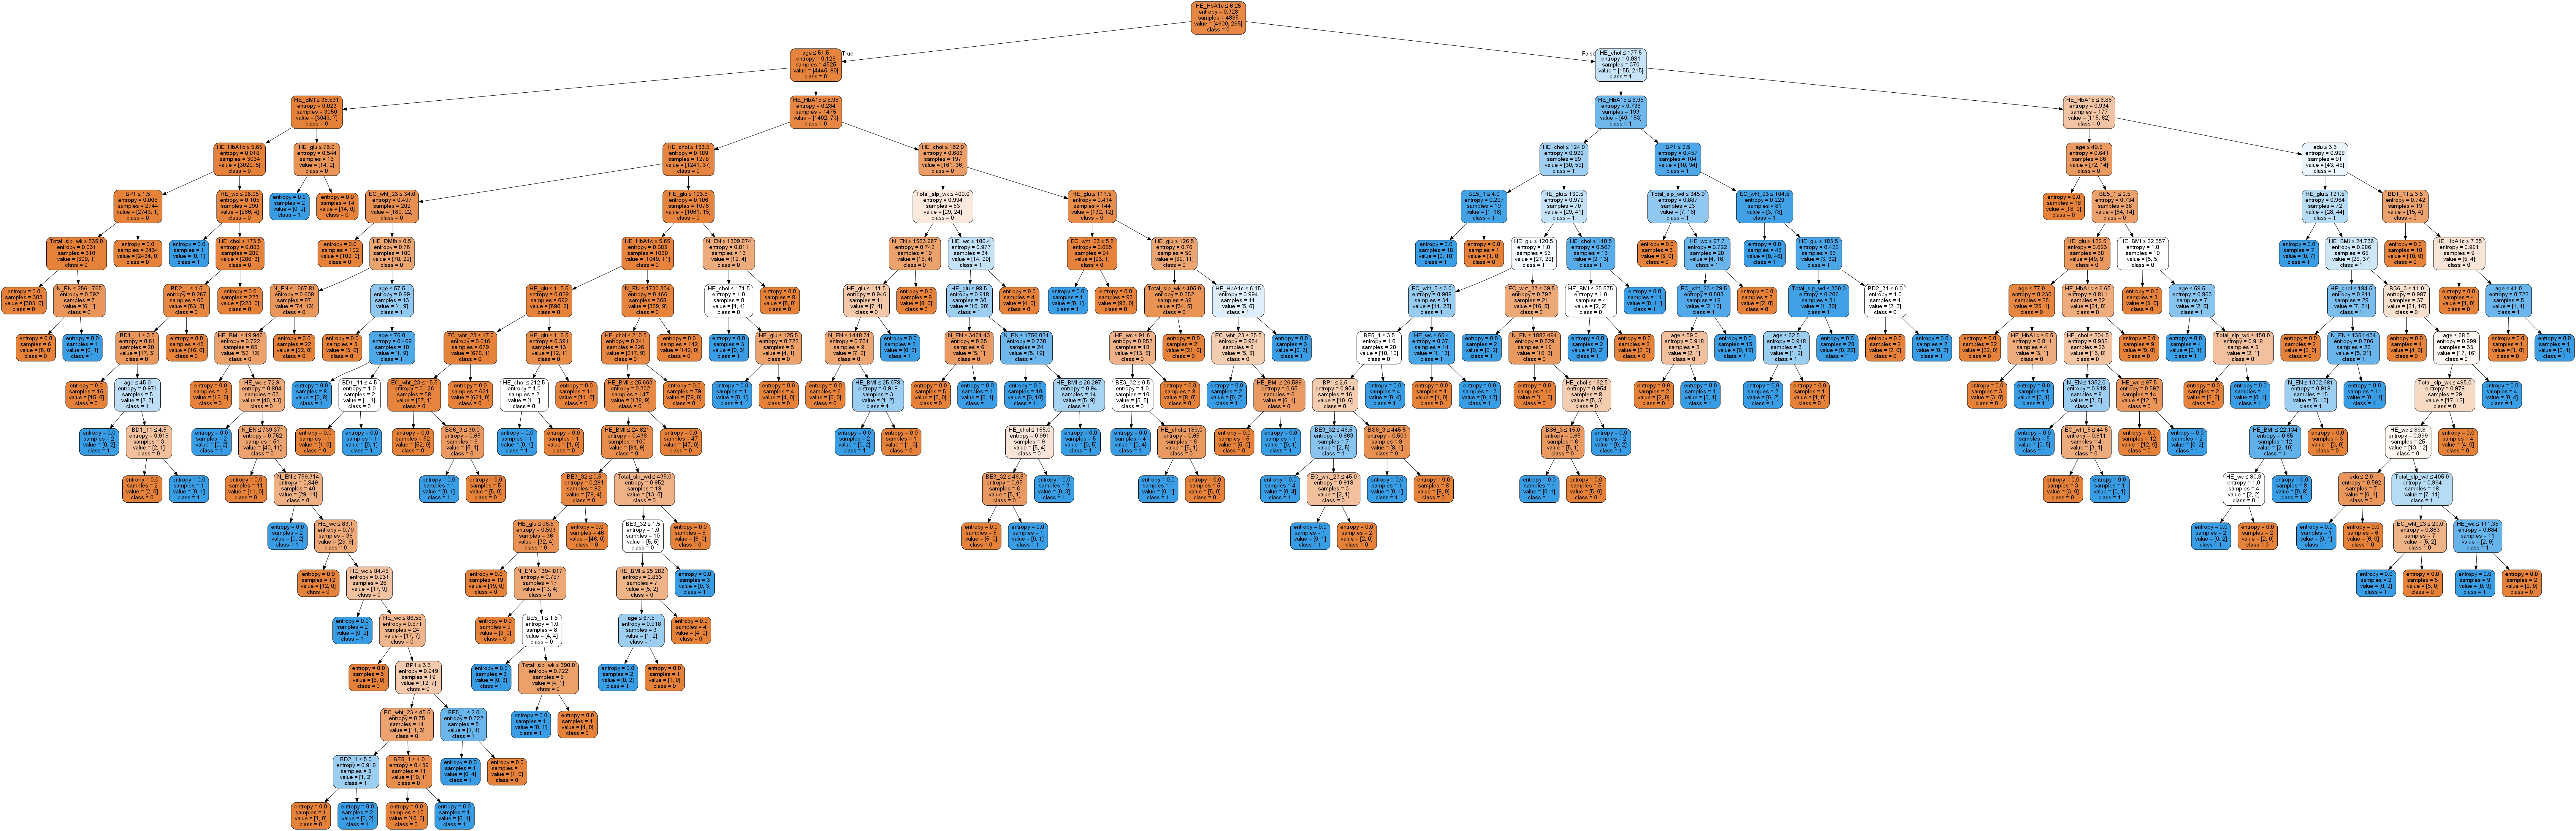

In [73]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [74]:
#print("특성중요도:\n{}".format(clf.feature_importances_))

feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

HE_HbA1c        0.480932
HE_chol         0.098677
age             0.080212
HE_glu          0.056882
N_EN            0.044452
EC_wht_23       0.043156
HE_wc           0.041958
HE_BMI          0.034153
BE5_1           0.016781
Total_slp_wk    0.014995
BE3_32          0.013797
Total_slp_wd    0.013343
BP1             0.012672
BD1_11          0.010749
BS6_3           0.009865
HE_DMfh         0.007158
edu             0.007104
EC_wht_5        0.005551
BD2_1           0.005077
BD2_31          0.002488
dtype: float64

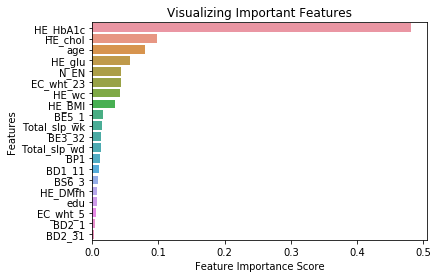

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp


# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

##### 8. 파라미터 조정

In [76]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from pprint import pprint

max_features = list(range(1,tmp.shape[1]))
max_features.append(None)
max_features.append('auto')
max_features.append('sqrt')
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create the random grid
param_grid = {'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split' : min_samples_split}
pprint(param_grid)

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': [1,
                  2,
                  3,
                  4,
                  5,
                  6,
                  7,
                  8,
                  9,
                  10,
                  11,
                  12,
                  13,
                  14,
                  15,
                  16,
                  17,
                  18,
                  19,
                  20,
                  None,
                  'auto',
                  'sqrt'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [77]:
rf = DecisionTreeClassifier()
rf_param = GridSearchCV(estimator = rf, param_grid=param_grid, cv=10)
# Fit the random search model
rf_param.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None, 'auto', 'sqrt'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
print(rf_param.best_params_)

{'max_depth': 4, 'max_features': 18, 'min_samples_split': 5}


In [79]:
opti_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4, max_features=16, min_samples_split= 9)
opti_tree = opti_tree.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(opti_tree, X, y, cv=10, scoring="roc_auc")

print("=== Confusion Matrix ===") #true positive/ false negative/ false positive/ true nagative
print(confusion_matrix(y_test, y_pred)) #evaluate the accuracy of a classification
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1916   51]
 [  56   76]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97      1967
        1.0       0.60      0.58      0.59       132

avg / total       0.95      0.95      0.95      2099



=== All AUC Scores ===
[0.95959435 0.97908039 0.96454993 0.93743584 0.94750628 0.90899437
 0.96028459 0.967643   0.95020325 0.92706519]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9502357194318428


In [53]:
print("roc_auc: ",metrics.roc_auc_score(y_test, y_pred))
print("Accuracy:",opti_tree.score(X_train,y_train))
print("accuracy_score: ",metrics.accuracy_score(y_test, y_pred))

roc_auc:  0.7802279274699204
Accuracy: 0.9660878447395301
accuracy_score:  0.9523582658408766


##### 9. 모델 저장 및 저장된 모델 불러와서 테스트하기
- ***** 서버측에서 머신러닝 사용시 모델만 불러와서 사용하면 된다.*****
- 참고: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [21]:
import pickle
# 모델 저장
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# 모델 불러오기
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

0.96141019533111
